## Task 6.5:  Unsupervised Machine Learning

**01. Importing libraries**

**02. Importing the data**

**03. Data preprocessing**

**04. Finding the elbow**

**05. K-means clustering**

## 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
# Making sure that the created graphics are displayed without needing to call them 
%matplotlib inline

## 02. Importing the data

In [3]:
#creating a path 
path = path = r'C:\Users\amore\Documents\Data Analyst course\Data Immersion\Achievement 6 Advanced Analytics\Airbnb Europe Analysis'

In [4]:
# importing the data
df_bnb=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','airbnb_europe_clean2.pkl'))

## 03. Data preprocessing

In [5]:
# creating a subset with the quantitative variables to study
sub= df_bnb[['price','minimum_nights','number_of_reviews', 'calculated_host_listings_count', 'availability_365','latitude','longitude']]

In [6]:
# creating a copy so i don't get a python warning on "modifying a slice of a dataframe"
sub_copy = sub.copy()
sub_copy.rename(columns={'price':'X1_price','minimum_nights': 'X2_minimum_nights','number_of_reviews':'X3_number_of_reviews', 'calculated_host_listings_count' : 'X4_calculated_host_listings_count', 'availability_365': 'X5_availability_365', 'latitude':'X6_latitude', 'longitude':'X7_longitude'}, inplace = True)

In [7]:
sub_copy.dropna(inplace=True) # remove rows with missing values
sub_copy.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True) # replace infinity and very large values with maximum value


## 04. Finding the elbow

In [8]:
# creating the k-means object
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [9]:
#finding out the variation for the selected k-means cluster option
score = [kmeans[i].fit(sub_copy).score(sub_copy) for i in range(len(kmeans))] 

score

[-20872745202.429893,
 -12781028577.173664,
 -9600516094.882664,
 -7578726401.973967,
 -6389069801.831986,
 -5605281905.405486,
 -4931172937.462383,
 -4267897126.8159065,
 -3995248871.2636023]

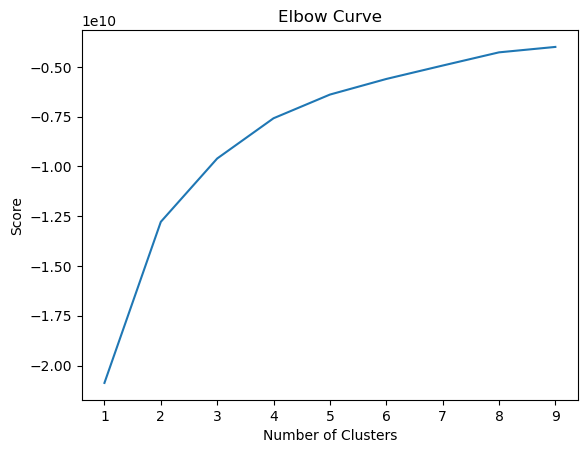

In [10]:
# Ploting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**After visualizing the elbow curve I've decided to use 4 clusters, as i deemed that this was the number in which the curve started to flatten.**

## 05. K-means clustering

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, random_state = 0) 

In [12]:
# Fit the k-means object to the data.

kmeans.fit(sub)

KMeans(n_clusters=4, random_state=0)

In [13]:
#attaching the new "clusters" column to the sub_copy subset
sub_copy['clusters'] = kmeans.fit_predict(sub)

In [14]:
sub_copy['clusters'].value_counts()

1    237178
2    179953
3     26177
0     16757
Name: clusters, dtype: int64

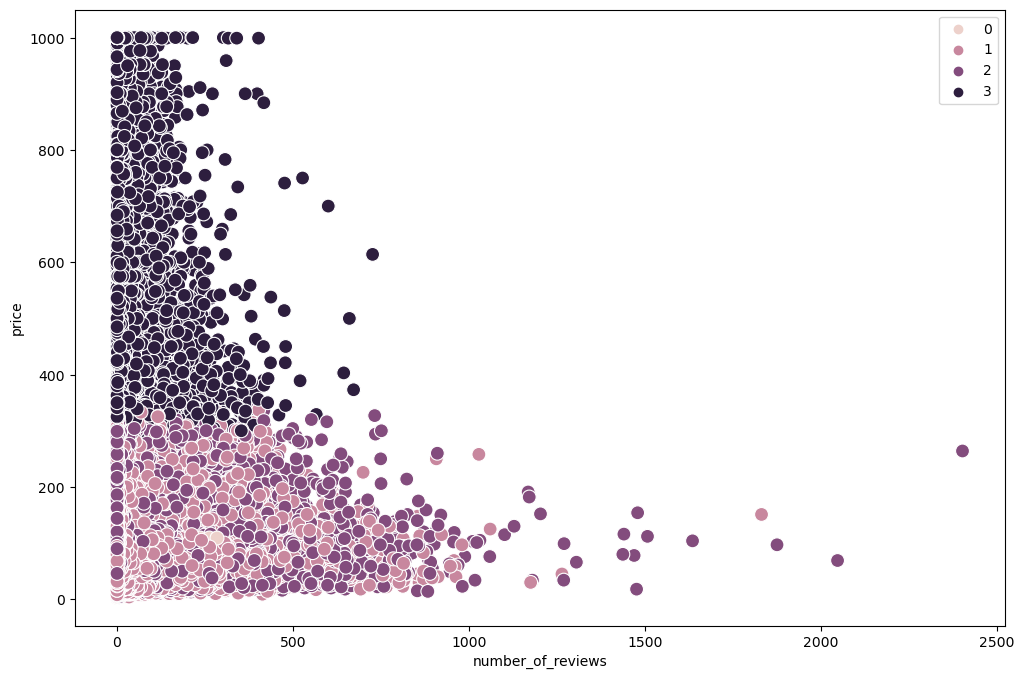

In [15]:
# Plotting the clustered data for "price" and "number of reivews"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_copy['X3_number_of_reviews'], y=sub_copy['X1_price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('number_of_reviews') 
plt.ylabel('price') 
plt.show()

C:\Users\amore\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


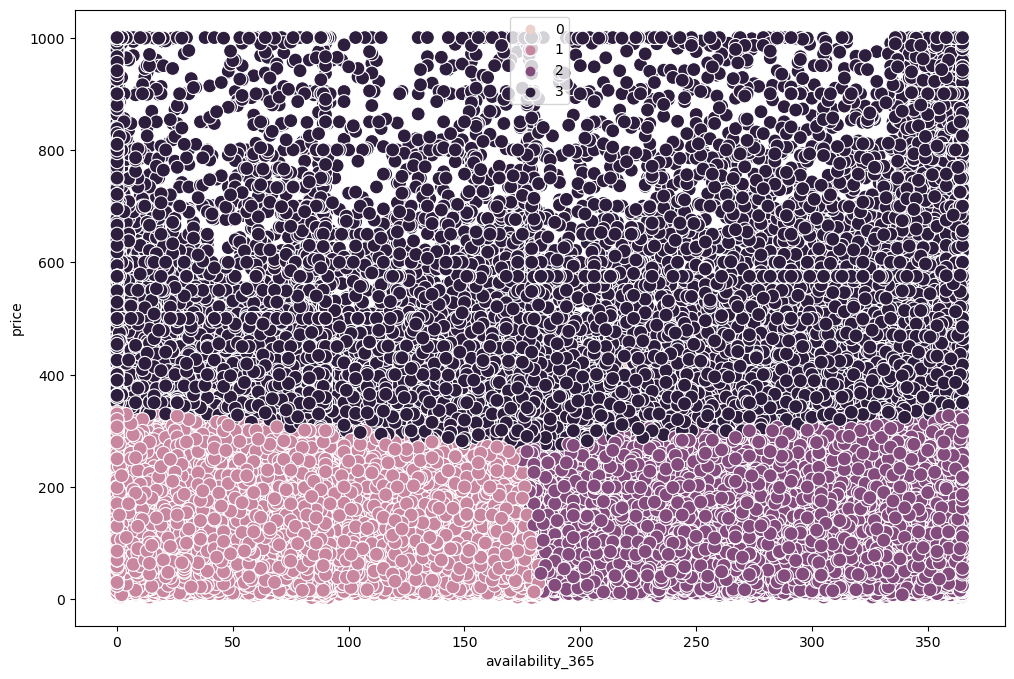

In [16]:
# Plotting the clustered data for "price" and "availability"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_copy['X5_availability_365'], y=sub_copy['X1_price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('availability_365') 
plt.ylabel('price') 
plt.show()

C:\Users\amore\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


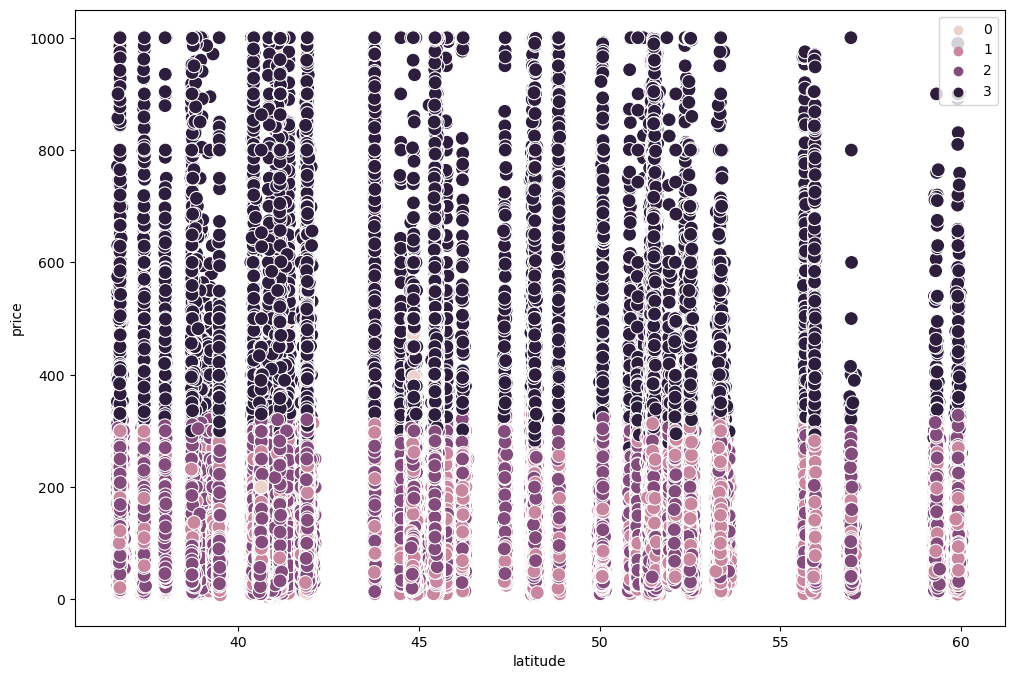

In [17]:
# Plotting the clustered data for "price" and "latitude"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_copy['X6_latitude'], y=sub_copy['X1_price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('latitude') 
plt.ylabel('price') 
plt.show()

**To be completely honest the result of the clusters doesn't make a lot of sense to me, if anything if seems that cluster 3 includes, in all the visualizations, the accomodations with the highest prices, whereas the rest of clusters are not desernible from each-other. All in all this seems to confirm what I already saw in the three previous exercises, i.e. that the quantitative data of my dataset is poorly correlated (or not at all) or, in other words, that the variations on Airbnb prices are, primarily due to qualitative factors or quantitative factors of which I do not have enough data. The results obtained, are basically an indication of the need for additional data, and also to focus on analyzing the impact of qualitative factors on the prices of Airbnb accomodations**